# Applied ML Assignment 5 - Transfer learning on Image Data

Name- Soham Sengupta   
Roll No.- MDS202241

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
base_dir = '/content/drive/MyDrive/Applied ML/data'
chicken_dir = f'{base_dir}/chicken'
duck_dir = f'{base_dir}/duck'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.15)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,                    # Directory path containing your dataset
    target_size=(img_height, img_width),  # Resizing images to this dimension
    batch_size=batch_size,       # Number of images per batch
    class_mode='binary',         # Type of label arrays (binary for 2 classes)
    subset='training'            # Subset of data to use (training subset)
)

Found 184 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 32 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                             include_top=False,
                             weights='imagenet')
base_model.trainable = False

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
 model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 128)               10485888  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12744001 (48.61 MB)
Trainable params: 10486017 (40.00 MB)
Non-trainable params: 2257984 (8.61 MB)
__________

In [ ]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)

Epoch 1/10
5/5 [==============================] - 105s 19s/step - loss: 4.3715 - accuracy: 0.7039 - val_loss: 3.1538 - val_accuracy: 0.6562
Epoch 2/10
5/5 [==============================] - 4s 802ms/step - loss: 2.9574 - accuracy: 0.8618 - val_loss: 2.2900 - val_accuracy: 0.8438
Epoch 3/10
5/5 [==============================] - 4s 843ms/step - loss: 6.0368 - accuracy: 0.7566 - val_loss: 1.0246 - val_accuracy: 0.8438
Epoch 4/10
5/5 [==============================] - 5s 890ms/step - loss: 2.1896 - accuracy: 0.9187 - val_loss: 0.8423 - val_accuracy: 0.9062
Epoch 5/10
5/5 [==============================] - 4s 847ms/step - loss: 0.7621 - accuracy: 0.9342 - val_loss: 0.2731 - val_accuracy: 0.9062
Epoch 6/10
5/5 [==============================] - 5s 1s/step - loss: 0.9420 - accuracy: 0.9145 - val_loss: 3.0834 - val_accuracy: 0.8438
Epoch 7/10
5/5 [==============================] - 4s 865ms/step - loss: 0.6591 - accuracy: 0.9474 - val_loss: 1.7150 - val_accuracy: 0.9062
Epoch 8/10
5/5 [=======

In [ ]:
# Predict on the validation set
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
predicted_classes = [1 if prob > 0.5 else 0 for prob in predictions]

1/1 [==============================] - 1s 839ms/step


In [ ]:
print(classification_report(val_labels, predicted_classes, target_names=['Chicken', 'Duck']))

              precision    recall  f1-score   support

     Chicken       0.86      0.75      0.80        16
        Duck       0.78      0.88      0.82        16

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32



In [ ]:
cm = confusion_matrix(val_labels, predicted_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  4]
 [ 2 14]]


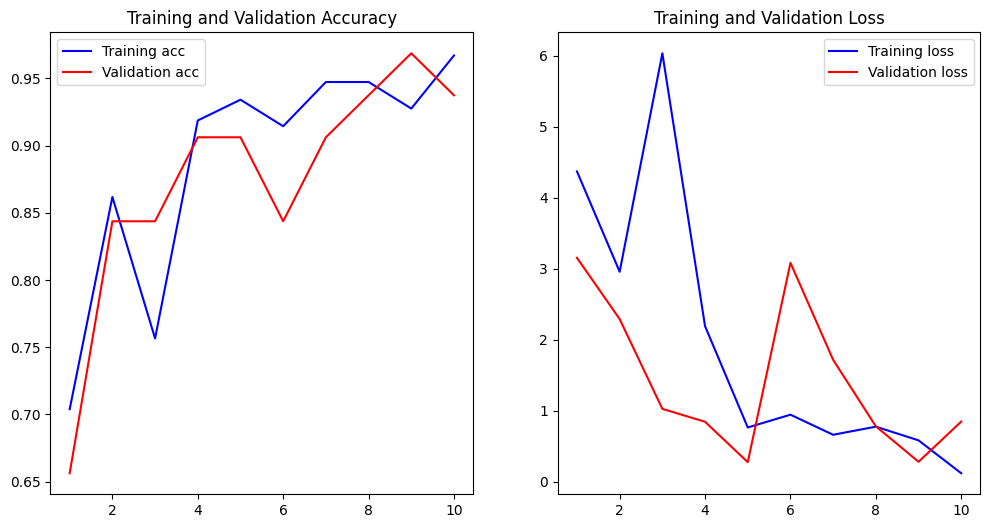

In [ ]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training(history)